In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

airbnb_original = pd.read_csv('/content/drive/MyDrive/UCLA/Winter 2023/CS M148/Project 1/AB_NYC_2019.csv')
airbnb_original.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [31]:
airbnb = airbnb_original.drop(['name', 'host_id', 'host_name', 'last_review', 'neighbourhood'], axis=1)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 4.1+ MB


In [43]:
import plotly.express as px
px.pie(airbnb, names='neighbourhood_group', title='Distribution of Rental Units Across NYC Boroughs')

In [40]:
airbnb.groupby(['neighbourhood_group'])['number_of_reviews'].sum()

neighbourhood_group
Bronx             28371
Brooklyn         486574
Manhattan        454569
Queens           156950
Staten Island     11541
Name: number_of_reviews, dtype: int64

In [42]:
sum_reviews = airbnb.groupby(['neighbourhood_group']).sum()
px.bar(sum_reviews, y='number_of_reviews')

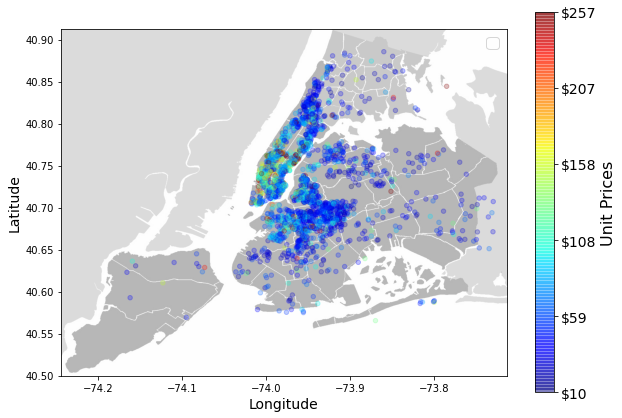

In [36]:
ny_img = mpimg.imread('/content/drive/MyDrive/UCLA/Winter 2023/CS M148/Project 1/nyc.png')
graph_airbnbs = airbnb.sample(frac=0.05)

# In order to get a better spread of price descriptions we are going to 
# utilize info abt airbnbs price. We will set all values of the mean + 2 * std dev to the same value
max_val = graph_airbnbs.describe().loc["mean"]["price"] + 1.5 * graph_airbnbs.describe().loc["std"]["price"]
for i, row in graph_airbnbs.iterrows():
    if row["price"] > max_val:
        graph_airbnbs.at[i, "price"] = max_val


ax = graph_airbnbs.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                    c="price", cmap=plt.get_cmap('jet'), colorbar=False, alpha=0.25
                 )

plt.imshow(ny_img, extent=[-74.24442, -73.71299, 40.49979, 40.91306], alpha=0.5,
            cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
           
prices = graph_airbnbs["price"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cb = plt.colorbar()
cb.ax.set_yticklabels(["$%d"%v for v in tick_values], fontsize=14)
cb.set_label("Unit Prices", fontsize=16)

plt.legend(fontsize=16)
plt.show()


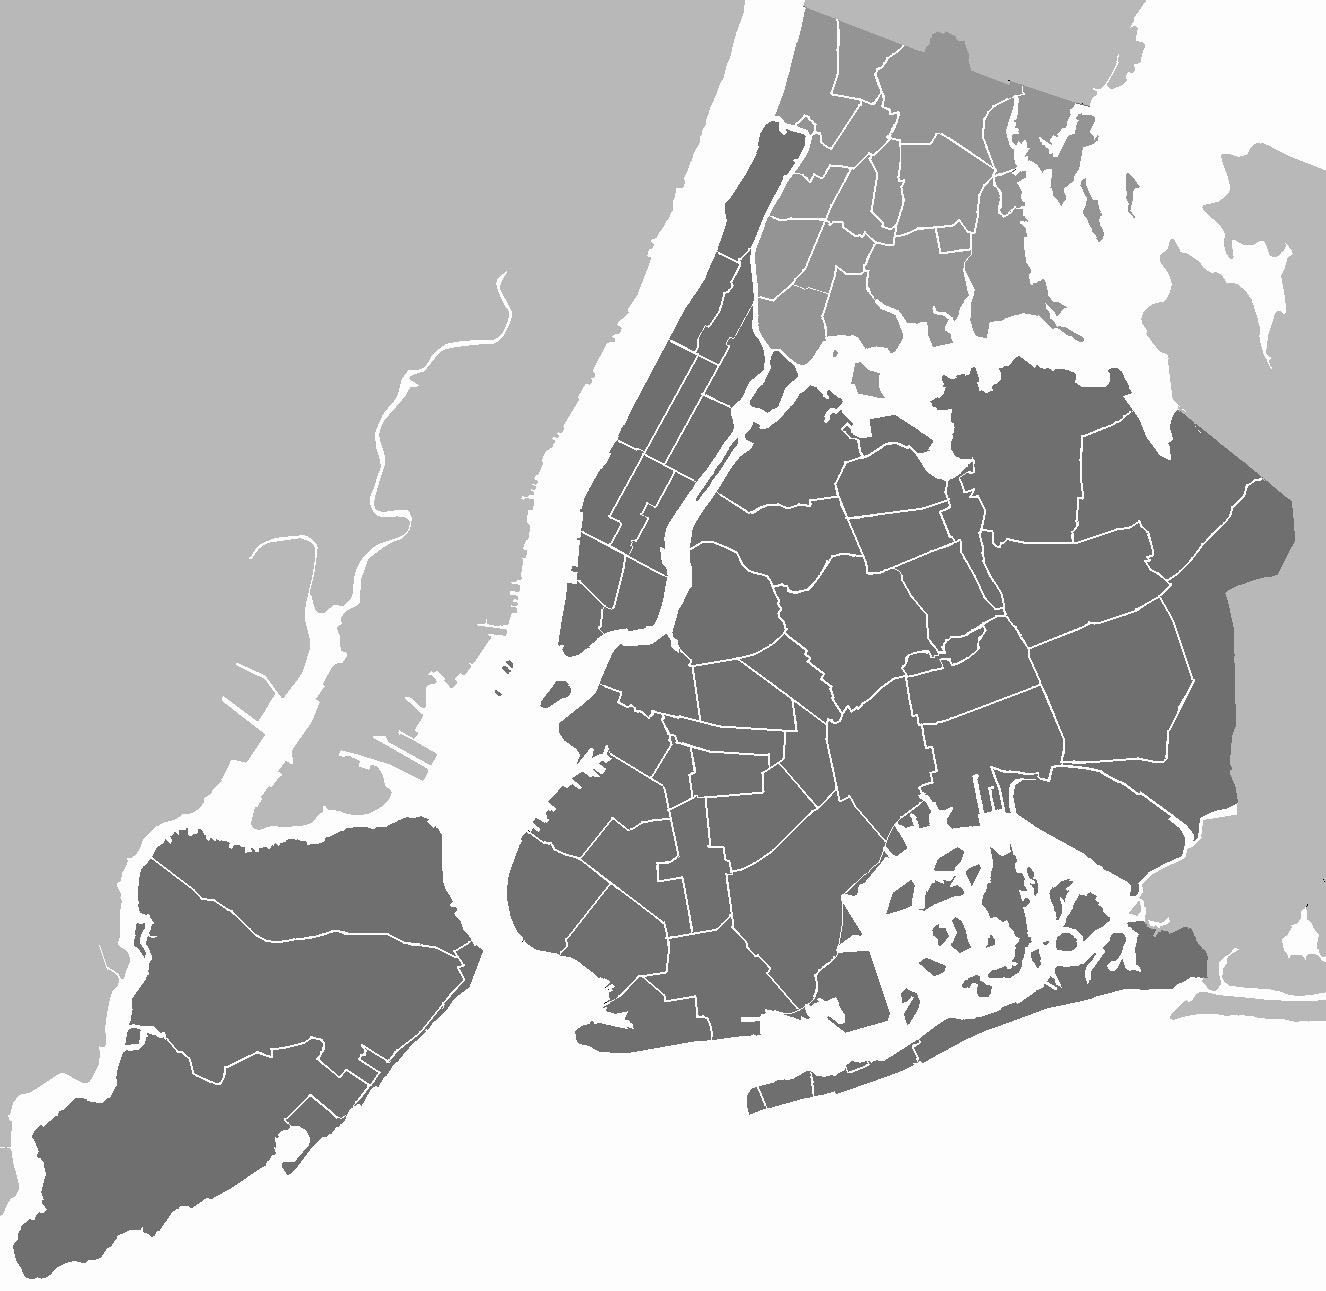

In [37]:
from PIL import Image

map = px.scatter(airbnb, x='longitude', y='latitude', color='room_type', size='price', hover_data=['price'])

map.add_layout_image(dict(
    source=Image.open("/content/drive/MyDrive/UCLA/Winter 2023/CS M148/Project 1/nyc.png"), 
    xref="x", 
    yref="y", 
    x=-74.3, # This is bottom left corner
    y=40.95,  # This is top left corner
    sizex=0.6, # Change these
    sizey=0.5,  # until it looks ok
    opacity=0.5, 
    sizing="stretch",
    layer="below"
))

map.update_layout(yaxis = dict(scaleanchor = 'x'))  # To not get super-stretch

In [39]:
filtered_reviews = airbnb[(airbnb['number_of_reviews'] >= 10) & (airbnb['neighbourhood_group'] == 'Brooklyn')]
filtered_room_type = filtered_reviews.groupby('room_type').mean()

px.bar(filtered_room_type, y='price')

#Image('/content/drive/MyDrive/UCLA/Winter 2023/CS M148/Project 1/room_type_graph.png')

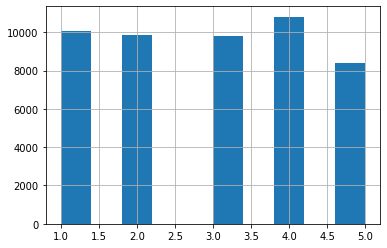

In [10]:
airbnb['price_cat'] = pd.qcut(airbnb['price'], q=5, labels=[1, 2, 3, 4, 5])
airbnb['price_cat'].value_counts()
airbnb['price_cat'].hist()

In [11]:
airbnb['total_min_price'] = airbnb['price'] * airbnb['minimum_nights']
airbnb.head()

,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_cat,total_min_price
0,2539,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,4,149
1,2595,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,5,225
2,3647,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,4,450
3,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2,89
4,5022,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2,800


In [12]:
incomplete_cols = airbnb.isnull().sum()
median = airbnb['reviews_per_month'].median()
airbnb['reviews_per_month'].fillna(median, inplace=True)

In [13]:
nonnumeric = airbnb.select_dtypes(exclude=np.number)
nonnumeric.head()

,neighbourhood_group,room_type,price_cat
0,Brooklyn,Private room,4
1,Manhattan,Entire home/apt,5
2,Manhattan,Private room,4
3,Brooklyn,Entire home/apt,2
4,Manhattan,Entire home/apt,2


In [14]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
airbnb['neighbourhood_group'] = labelencoder.fit_transform(airbnb['neighbourhood_group'])
airbnb['room_type'] = labelencoder.fit_transform(airbnb['room_type'])
airbnb.head()

,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_cat,total_min_price
0,2539,1,40.64749,-73.97237,1,149,1,9,0.21,6,365,4,149
1,2595,2,40.75362,-73.98377,0,225,1,45,0.38,2,355,5,225
2,3647,2,40.80902,-73.94190,1,150,3,0,0.72,1,365,4,450
3,3831,1,40.68514,-73.95976,0,89,1,270,4.64,1,194,2,89
4,5022,2,40.79851,-73.94399,0,80,10,9,0.10,1,0,2,800


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(airbnb, airbnb['neighbourhood_group']):
  train_set = airbnb.loc[train_index]
  test_set = airbnb.loc[test_index]

In [16]:
airbnb_training = train_set.drop(['price'], axis=1)
airbnb_labels = train_set['price'].copy()

airbnb_testing = test_set.drop(['price'], axis=1)
airbnb_test_labels = test_set['price'].copy()

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(airbnb_training, airbnb_labels)

data = airbnb_testing.iloc[:5]
labels = airbnb_test_labels.iloc[:5]

print("Predictions:", lin_reg.predict(data))
print("Actual labels:", list(labels))

Predictions: [163.16717247 -23.02722914 212.10632534  57.44456729 216.36702994]
Actual labels: [120, 35, 200, 75, 150]


In [18]:
from sklearn.metrics import mean_squared_error

training_preds = lin_reg.predict(airbnb_training)
training_mse = mean_squared_error(airbnb_labels, training_preds)
training_rmse = np.sqrt(training_mse)

testing_preds = lin_reg.predict(airbnb_testing)
testing_mse = mean_squared_error(airbnb_test_labels, testing_preds)
testing_rmse = np.sqrt(testing_mse)

print(training_rmse)
print(testing_rmse)

186.46112901768532
198.35555972555483
